# Reading in Files and Basic Analysis in R<br>

This notebook will be more serious than the last and look in more detail at using R in a practial way for data analysis. I am following this https://www.kaggle.com/rtatman/getting-started-in-r-summarize-data/ along. So this is not my own work, just documenting my learning process. 

In [1]:
#Import Libraries
library(tidyverse)
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [2]:
#Read in the file 
chocolateData <- read_csv('flavors_of_cacao.csv')

#Some of the col names have spaces, lets correct this 
names(chocolateData) <- make.names(names(chocolateData), unique = TRUE)

#Let's take a look at the first and last few lines of the data 
head(chocolateData, 5)
tail(chocolateData, 5)

Parsed with column specification:
cols(
  `Company 
(Maker-if known)` = col_character(),
  `Specific Bean Origin
or Bar Name` = col_character(),
  REF = col_double(),
  `Review
Date` = col_double(),
  `Cocoa
Percent` = col_character(),
  `Company
Location` = col_character(),
  Rating = col_double(),
  `Bean
Type` = col_character(),
  `Broad Bean
Origin` = col_character()
)


Company...Maker.if.known.,Specific.Bean.Origin.or.Bar.Name,REF,Review.Date,Cocoa.Percent,Company.Location,Rating,Bean.Type,Broad.Bean.Origin
A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


Company...Maker.if.known.,Specific.Bean.Origin.or.Bar.Name,REF,Review.Date,Cocoa.Percent,Company.Location,Rating,Bean.Type,Broad.Bean.Origin
Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
Zotter,Kerala State,781,2011,62%,Austria,3.25,,India
Zotter,"Brazil, Mitzi Blue",486,2010,65%,Austria,3.00,,Brazil


In [3]:
#Now we want to try looking at a specific cell of data, so we must specify row and col position 
chocolateData[1, 1]
#Maybe we want to see the first few entries of data but just the cocoa percent 
head(chocolateData[ , 5], 3)
#Maybe we just want to see a specific row 
chocolateData[19, ]

Company...Maker.if.known.
A. Morin


Cocoa.Percent
63%
70%
70%


Company...Maker.if.known.,Specific.Bean.Origin.or.Bar.Name,REF,Review.Date,Cocoa.Percent,Company.Location,Rating,Bean.Type,Broad.Bean.Origin
A. Morin,Piura,1019,2013,70%,France,3.25,,Peru


In [4]:
#We can remove values at a specific location by adding a - in front of the index
#And save it back to the data frame
#chocolateData <- chocolateData[-1, ]
#Check
#chocolateData[1, ]

So now we have looked at using a data frame and the basic functions next we need to do some basic cleaning on the data to ensure that it is usable (If you want to see a full data cleaning process please look at the census data analysis or the COVID-19 analysis).

In [5]:
#Remove any whitespace from the column names in the data 
#NOTE: I know '' is bad practice, it is a habit I need to break 
names(chocolateData) <- gsub('[[:space:]+]', '_', names(chocolateData))

In [6]:
#So checking the data types are what you are expecting is always a good start 
str(chocolateData)
# $ is weird and lets us specify the column in a data frame when used like:
head(chocolateData$Rating)
#tidyverse has a function for automatically converting data types, which saves a lot of programming 
chocolateData <- type_convert(chocolateData)

Classes 'spec_tbl_df', 'tbl_df', 'tbl' and 'data.frame':	1795 obs. of  9 variables:
 $ Company...Maker.if.known.       : chr  "A. Morin" "A. Morin" "A. Morin" "A. Morin" ...
 $ Specific.Bean.Origin.or.Bar.Name: chr  "Agua Grande" "Kpime" "Atsane" "Akata" ...
 $ REF                             : num  1876 1676 1676 1680 1704 ...
 $ Review.Date                     : num  2016 2015 2015 2015 2015 ...
 $ Cocoa.Percent                   : chr  "63%" "70%" "70%" "70%" ...
 $ Company.Location                : chr  "France" "France" "France" "France" ...
 $ Rating                          : num  3.75 2.75 3 3.5 3.5 2.75 3.5 3.5 3.75 4 ...
 $ Bean.Type                       : chr  " " " " " " " " ...
 $ Broad.Bean.Origin               : chr  "Sao Tome" "Togo" "Togo" "Togo" ...
 - attr(*, "spec")=
  .. cols(
  ..   `Company 
  .. (Maker-if known)` = col_character(),
  ..   `Specific Bean Origin
  .. or Bar Name` = col_character(),
  ..   REF = col_double(),
  ..   `Review
  .. Date` = col_double

[1] 3.75 2.75 3.00 3.50 3.50 2.75

Parsed with column specification:
cols(
  Company...Maker.if.known. = col_character(),
  Specific.Bean.Origin.or.Bar.Name = col_character(),
  Cocoa.Percent = col_character(),
  Company.Location = col_character(),
  Bean.Type = col_character(),
  Broad.Bean.Origin = col_character()
)


In [7]:
#Cocoa percent is still chr and not num, because it is a string containing % symbol
#Let's remove that % and try and convert again 
chocolateData$Cocoa.Percent <- sapply(chocolateData$Cocoa.Percent, function(x) gsub("%", "", x))

chocolateData <- type_convert(chocolateData)
#Cocoa percent is converted to a double, check just in case 
str(chocolateData)

Parsed with column specification:
cols(
  Company...Maker.if.known. = col_character(),
  Specific.Bean.Origin.or.Bar.Name = col_character(),
  Cocoa.Percent = col_double(),
  Company.Location = col_character(),
  Bean.Type = col_character(),
  Broad.Bean.Origin = col_character()
)


Classes 'spec_tbl_df', 'tbl_df', 'tbl' and 'data.frame':	1795 obs. of  9 variables:
 $ Company...Maker.if.known.       : chr  "A. Morin" "A. Morin" "A. Morin" "A. Morin" ...
 $ Specific.Bean.Origin.or.Bar.Name: chr  "Agua Grande" "Kpime" "Atsane" "Akata" ...
 $ REF                             : num  1876 1676 1676 1680 1704 ...
 $ Review.Date                     : num  2016 2015 2015 2015 2015 ...
 $ Cocoa.Percent                   : num  63 70 70 70 70 70 70 70 70 70 ...
 $ Company.Location                : chr  "France" "France" "France" "France" ...
 $ Rating                          : num  3.75 2.75 3 3.5 3.5 2.75 3.5 3.5 3.75 4 ...
 $ Bean.Type                       : chr  " " " " " " " " ...
 $ Broad.Bean.Origin               : chr  "Sao Tome" "Togo" "Togo" "Togo" ...
 - attr(*, "spec")=
  .. cols(
  ..   `Company 
  .. (Maker-if known)` = col_character(),
  ..   `Specific Bean Origin
  .. or Bar Name` = col_character(),
  ..   REF = col_double(),
  ..   `Review
  .. Date` = col_

NOTE: This is a mostly pre-prepared dataset so we aren't having to handle missing data at this time. In reality I think I would do most of the cleaning in python and possibly use this R tidyverse type conversion. I am aware both Python and R can be ran in a notebook together however I have not tried it as of yet. 

In [8]:
#Super handy, you can use ?function to find out what something does, saves the googling
#?summary #from R
#?summarise_all #From tidyverse lib

In [9]:
summary(chocolateData) #Shows the avarages, min, max and quater way points in the data 
summarise_all(chocolateData, funs(mean)) #Shows the mean of the whole table(numeric vals)

 Company...Maker.if.known. Specific.Bean.Origin.or.Bar.Name      REF      
 Length:1795               Length:1795                      Min.   :   5  
 Class :character          Class :character                 1st Qu.: 576  
 Mode  :character          Mode  :character                 Median :1069  
                                                            Mean   :1036  
                                                            3rd Qu.:1502  
                                                            Max.   :1952  
  Review.Date   Cocoa.Percent   Company.Location       Rating     
 Min.   :2006   Min.   : 42.0   Length:1795        Min.   :1.000  
 1st Qu.:2010   1st Qu.: 70.0   Class :character   1st Qu.:2.875  
 Median :2013   Median : 70.0   Mode  :character   Median :3.250  
 Mean   :2012   Mean   : 71.7                      Mean   :3.186  
 3rd Qu.:2015   3rd Qu.: 75.0                      3rd Qu.:3.500  
 Max.   :2017   Max.   :100.0                      Max.   :5.000  
  Bean

Warning message:
"funs() is soft deprecated as of dplyr 0.8.0
please use list() instead

# Before:
funs(name = f(.)

# After: 
list(name = ~f(.))
This warning is displayed once per session."Warning message in mean.default(Company...Maker.if.known.):
"argument is not numeric or logical: returning NA"Warning message in mean.default(Specific.Bean.Origin.or.Bar.Name):
"argument is not numeric or logical: returning NA"Warning message in mean.default(Company.Location):
"argument is not numeric or logical: returning NA"Warning message in mean.default(Bean.Type):
"argument is not numeric or logical: returning NA"Warning message in mean.default(Broad.Bean.Origin):
"argument is not numeric or logical: returning NA"

Company...Maker.if.known.,Specific.Bean.Origin.or.Bar.Name,REF,Review.Date,Cocoa.Percent,Company.Location,Rating,Bean.Type,Broad.Bean.Origin
NA,NA,1035.905,2012.325,71.69833,NA,3.185933,NA,NA


In [10]:
#Add a mean and sd for the rating columns 
chocolateData %>%
    summarise(averageRating = mean(Rating), 
             sdRating = sd(Rating))

averageRating,sdRating
3.185933,0.4780624


In [11]:
#Return avg and sd of rating by year 
chocolateData %>%
    group_by(Review.Date) %>%
    summarise(averageRating = mean(Rating), 
             sdRating = sd(Rating))

Review.Date,averageRating,sdRating
2006,3.125000,0.7691224
2007,3.162338,0.6998193
2008,2.994624,0.5442118
2009,3.073171,0.4591195
2010,3.148649,0.4663426
2011,3.256061,0.4899536
2012,3.178205,0.4835962
2013,3.197011,0.4461178
2014,3.189271,0.4148615
2015,3.246491,0.3810960


Now we want to make some graphs for the data. this will be done using ggplot 2 lib. 

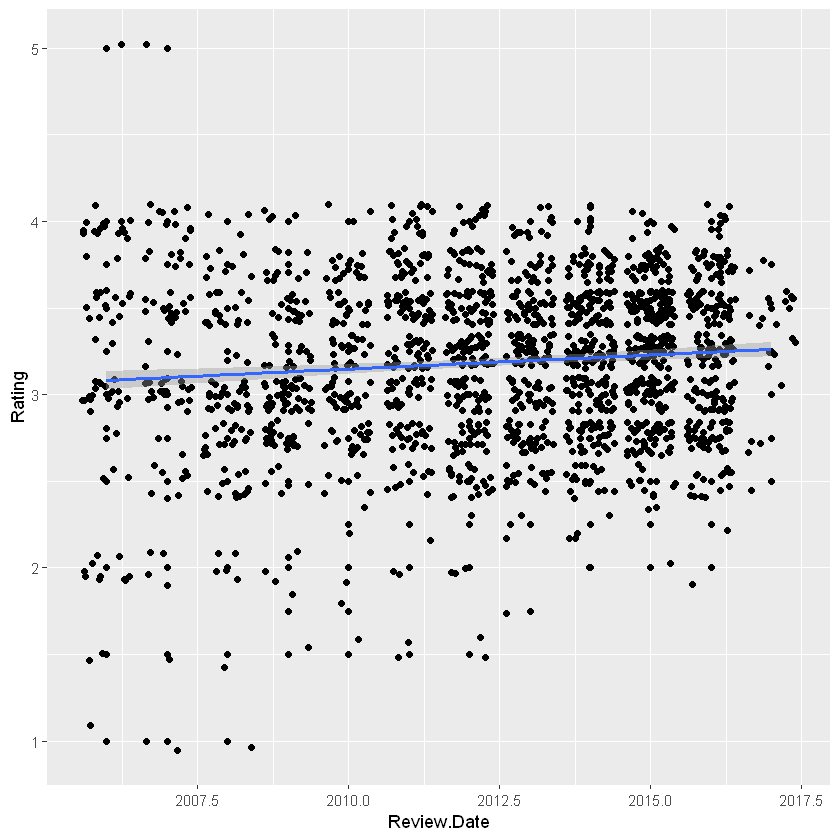

In [12]:
#ggplot specifes the df and aes, geom point adds data, geom jitter for legibility, geom smooth for clarity
ggplot(chocolateData, aes(x = Review.Date, y = Rating)) + geom_point() + geom_jitter() + geom_smooth(method = 'lm')

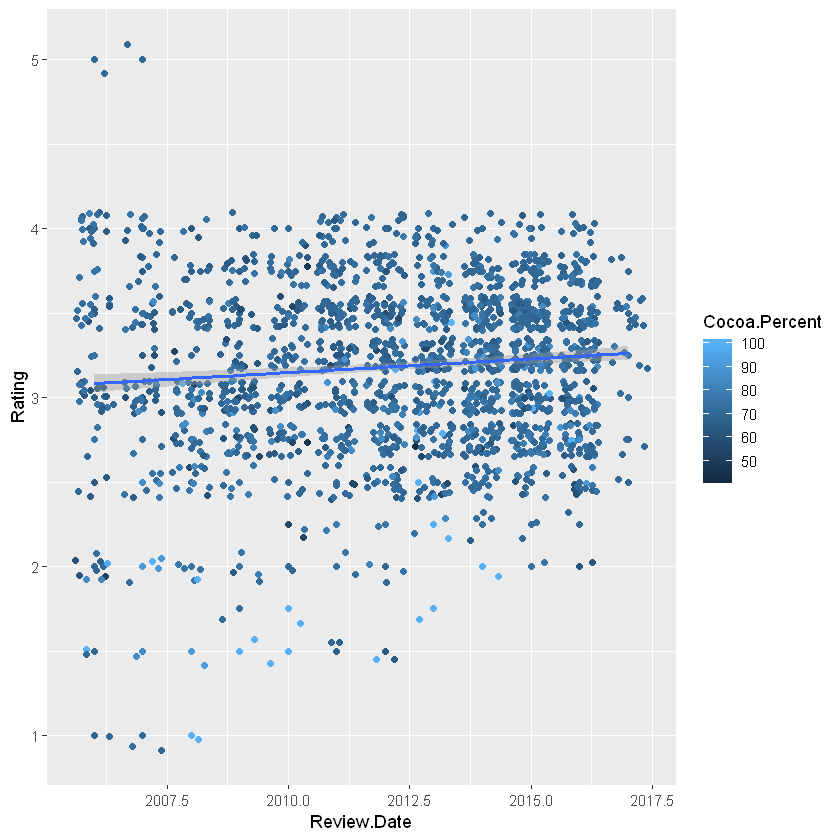

In [13]:
#We can now use the above but add cocoa percent to see if that has an impact on the rating 
chocPlot <- ggplot(chocolateData, aes(x = Review.Date, y = Rating, color = Cocoa.Percent))+
geom_point()+
geom_jitter()+
geom_smooth(method = 'lm')

chocPlot

In [14]:
#We can save this plot now 
ggsave('ChocolateRatingByReviewDataCondCocoa.png', plot = chocPlot, height = 6, width = 10, units = 'in')

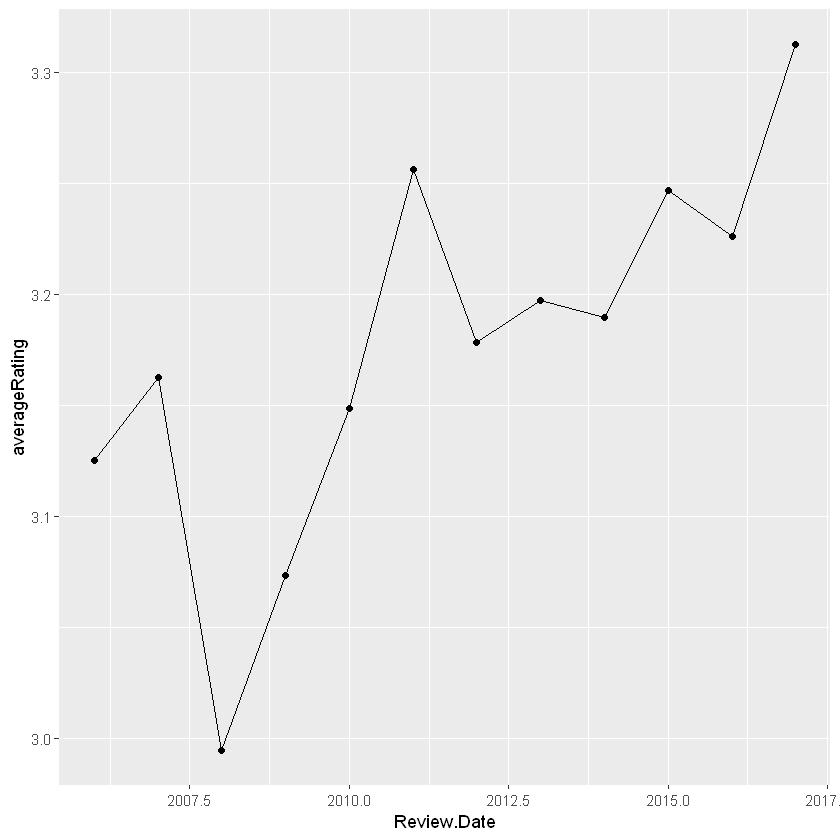

In [15]:
#We can also plot summarized datasets
avgRatingYear <- chocolateData %>%
    group_by(Review.Date) %>%
    summarise(averageRating = mean(Rating))
#plot avg rating by yr
chocPlot1 <- ggplot(avgRatingYear, aes(y = averageRating, x = Review.Date)) +
geom_point()+
geom_line()

chocPlot1

ggsave('ChocAvgRatingbyYear.png', plot = chocPlot1, height = 6, width = 10, units = 'in')

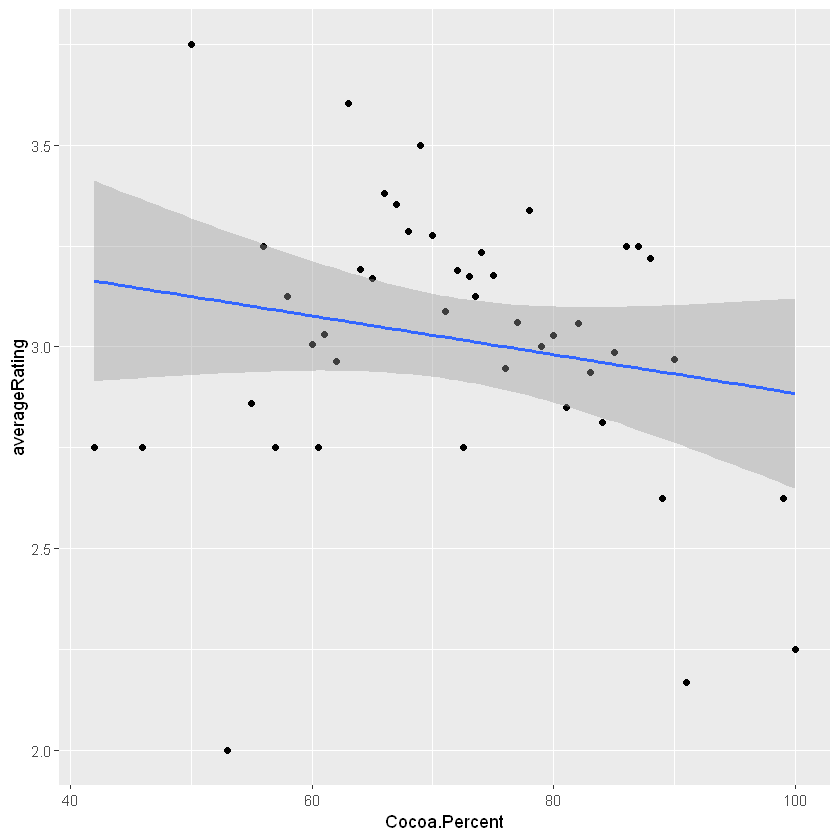

In [17]:
#Smooth the above so that it makes more sense 
avgRatingYear <- chocolateData %>%
    group_by(Cocoa.Percent) %>%
    summarise(averageRating = mean(Rating))

chocPlot2 <- ggplot(avgRatingYear, aes(y = averageRating, x = Cocoa.Percent)) +
geom_point()+
geom_smooth(method = 'lm')
chocPlot2

ggsave('RatingbyCocoaPC2.png', plot = chocPlot2, height = 6, width = 10, units = 'in')